In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
url='C:/Users/Mayuri Tambe/Downloads/heart.csv'
df=pd.read_csv(url)


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# 1.Data cleaning:


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes


age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [7]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
###Before we plot the outliers, let's change the labeling for better visualization and interpretation for
heart dataset.
df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({0: "typical_angina",1: "atypical_angina",2:"non-anginal pain",3: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
df['slope'] = df.slope.replace({0: "upsloping", 1:"flat",2:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect",3:"normal"})


C:\Users\Mayuri Tambe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


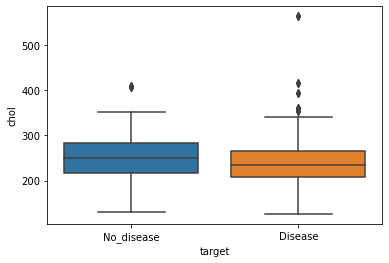

In [11]:
bxplt = sns.boxplot(df["target"],df["chol"])
plt.show()

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

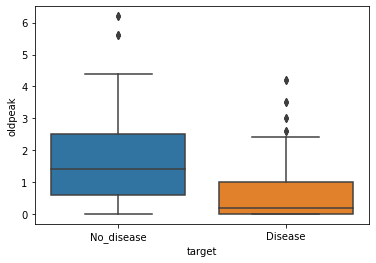

In [12]:
sns.boxplot(x='target', y='oldpeak', data=df)


In [15]:
###define continuous variable & plot
continous_features = ['age','trestbps','chol','thalach','oldpeak']
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continous_features])


For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 30
For the feature chol, No of Outliers is 16
For the feature thalach, No of Outliers is 4
For the feature oldpeak, No of Outliers is 7


In [17]:
###Drop Outliers
outliers(df[continous_features],drop=True)


Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


In [18]:
###Duplicate rows:


In [19]:
duplicated=df.duplicated().sum()


In [20]:
duplicated

678

In [21]:
if duplicated:
    print("Duplicated rows :{}".format(duplicated))
else:
    print("No duplicates")


Duplicated rows :678


In [22]:
###Displaying duplicate rows
duplicates=df[df.duplicated(keep=False)]
duplicates.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2,normal,No_disease
1,53,Male,typical_angina,140,203,True,0,155,Yes,3.1,upsloping,0,normal,No_disease
2,70,Male,typical_angina,145,174,False,1,125,Yes,2.6,upsloping,0,normal,No_disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1,normal,No_disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3,reversable_defect,No_disease


In [23]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2,normal,No_disease
1,53,Male,typical_angina,140,203,True,0,155,Yes,3.1,upsloping,0,normal,No_disease
2,70,Male,typical_angina,145,174,False,1,125,Yes,2.6,upsloping,0,normal,No_disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1,normal,No_disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3,reversable_defect,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Female,non-anginal pain,120,211,False,0,115,No,1.5,flat,0,reversable_defect,Disease
733,44,Female,non-anginal pain,108,141,False,1,175,No,0.6,flat,0,reversable_defect,Disease
739,52,Male,typical_angina,128,255,False,1,161,Yes,0.0,downsloping,1,normal,No_disease
843,59,Male,asymtomatic,160,273,False,0,125,No,0.0,downsloping,0,reversable_defect,No_disease


In [24]:
duplicates.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2,normal,No_disease
1,53,Male,typical_angina,140,203,True,0,155,Yes,3.1,upsloping,0,normal,No_disease
2,70,Male,typical_angina,145,174,False,1,125,Yes,2.6,upsloping,0,normal,No_disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1,normal,No_disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3,reversable_defect,No_disease


In [25]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2,normal,No_disease
1,53,Male,typical_angina,140,203,True,0,155,Yes,3.1,upsloping,0,normal,No_disease
2,70,Male,typical_angina,145,174,False,1,125,Yes,2.6,upsloping,0,normal,No_disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1,normal,No_disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3,reversable_defect,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Female,non-anginal pain,120,211,False,0,115,No,1.5,flat,0,reversable_defect,Disease
733,44,Female,non-anginal pain,108,141,False,1,175,No,0.6,flat,0,reversable_defect,Disease
739,52,Male,typical_angina,128,255,False,1,161,Yes,0.0,downsloping,1,normal,No_disease
843,59,Male,asymtomatic,160,273,False,0,125,No,0.0,downsloping,0,reversable_defect,No_disease


In [26]:
duplicated=df.duplicated().sum()

In [27]:
duplicated

678

# 2.Data integration


In [31]:
dataset1="C:/Users/Mayuri Tambe/Downloads/student.csv"
dataset2 ="C:/Users/Mayuri Tambe/Downloads/mark.csv"

In [32]:
df1 = pd.read_csv(dataset1, header = 0)
df2 = pd.read_csv(dataset2, header = 0)

In [33]:
df1.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [34]:
df2.head()

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


In [35]:
####Student_id is common to both datasets. Perform data integration on both the DataFrames with
##respect to the Student_id column using the pd.merge() function, and then print the first 10 values of
##the new DataFrame:


SyntaxError: invalid syntax (3222376553.py, line 2)

In [36]:
df = pd.merge(df1, df2, on = 'Student_id')
df.head(10)


,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi
5,6,20,Male,2nd Class,yes,69,Gwalior
6,7,19,Female,3rd Class,yes,52,Bhopal
7,8,21,Male,3rd Class,yes,54,Chennai
8,9,22,Female,3rd Class,yes,55,Delhi
9,10,21,Male,1st Class,no,94,Mumbai


# 3.Data transformation
To transform the data into a machine-learning-digestible format. All machine learning algorithms are based on mathematics. So,
we need to convert all the columns into numerical format

In [39]:
url='C:/Users/Mayuri Tambe/Downloads/heart.csv'
df=pd.read_csv(url)


In [40]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [53]:
url="C:/Users/Mayuri Tambe/Downloads/AirQuality.csv"
ddf=pd.read_csv(url,encoding='cp1252')

C:\Users\Mayuri Tambe\AppData\Local\Temp\ipykernel_11180\1761435286.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ddf=pd.read_csv(url,encoding='cp1252')


In [62]:
ddf

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,1,4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,2,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,1,6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,1,6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,2,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435736,SAMP,24-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,5,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,24-12-2015
435737,SAMP,29-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,5,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,29-12-2015
435738,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435739,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
###stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the
dataset in terms of information. Therefore, we can drop those columns.
###Dropping rows where no date is available.

In [64]:
ddf=ddf.drop(['stn_code','agency','sampling_date','location_monitoring_station'], axis = 1)
#dropping columns that aren't required

In [65]:
ddf=ddf.dropna(subset=['date']) # dropping rows where no date is availabl

In [67]:
# defining columns of importance, which shall be used reguarly
COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
from sklearn.impute import SimpleImputer
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
ddf[COLS] = imputer.fit_transform(ddf[COLS])

In [68]:
ddf[COLS]

,so2,no2,rspm,spm,pm2_5
0,4.8,17.4,108.833285,220.784295,40.791467
1,3.1,7.0,108.833285,220.784295,40.791467
2,6.2,28.5,108.833285,220.784295,40.791467
3,6.3,14.7,108.833285,220.784295,40.791467
4,4.7,7.5,108.833285,220.784295,40.791467
...,...,...,...,...,...
435733,20.0,44.0,148.000000,220.784295,40.791467
435734,17.0,44.0,131.000000,220.784295,40.791467
435735,18.0,45.0,140.000000,220.784295,40.791467
435736,22.0,50.0,143.000000,220.784295,40.791467


In [69]:
ddf['type'].value_counts()

1                   179013
2                    96089
3                    86791
Industrial Areas     51746
4                     8979
Sensitive Areas       5536
5                     1304
Sensitive              495
Industrial             233
6                      158
Name: type, dtype: int64

In [70]:
ddf['type']

0         1
1         2
2         1
3         1
4         2
         ..
435733    5
435734    5
435735    5
435736    5
435737    5
Name: type, Length: 435734, dtype: object

In [ ]:
###Converting Categorical Data to Numerical Data Using Label Encoding

In [72]:
ddf['state'].value_counts()

Maharashtra             60382
Uttar Pradesh           42816
Andhra Pradesh          26368
Punjab                  25634
Rajasthan               25589
Kerala                  24728
Himachal Pradesh        22896
West Bengal             22463
Gujarat                 21279
Tamil Nadu              20597
Madhya Pradesh          19920
Assam                   19361
Odisha                  19278
Karnataka               17117
Delhi                    8551
Chandigarh               8520
Chhattisgarh             7831
Goa                      6206
Jharkhand                5968
Mizoram                  5338
Telangana                3978
Meghalaya                3853
Puducherry               3785
Haryana                  3420
Nagaland                 2463
Bihar                    2275
Uttarakhand              1961
Jammu & Kashmir          1289
Daman & Diu               782
Dadra & Nagar Haveli      634
Uttaranchal               285
Arunachal Pradesh          90
Manipur                    76
Sikkim    

In [73]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
ddf["state"]=labelencoder.fit_transform(ddf["state"])
ddf.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,0,Hyderabad,1,4.8,17.4,108.833285,220.784295,40.791467,01-02-1990
1,0,Hyderabad,2,3.1,7.0,108.833285,220.784295,40.791467,01-02-1990
2,0,Hyderabad,1,6.2,28.5,108.833285,220.784295,40.791467,01-02-1990
3,0,Hyderabad,1,6.3,14.7,108.833285,220.784295,40.791467,01-03-1990
4,0,Hyderabad,2,4.7,7.5,108.833285,220.784295,40.791467,01-03-1990


In [ ]:
###One Hot Encoding

In [75]:
dfAndhra=ddf[(ddf['state']==0)]
dfAndhra

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,0,Hyderabad,1,4.8,17.4,108.833285,220.784295,40.791467,01-02-1990
1,0,Hyderabad,2,3.1,7.0,108.833285,220.784295,40.791467,01-02-1990
2,0,Hyderabad,1,6.2,28.5,108.833285,220.784295,40.791467,01-02-1990
3,0,Hyderabad,1,6.3,14.7,108.833285,220.784295,40.791467,01-03-1990
4,0,Hyderabad,2,4.7,7.5,108.833285,220.784295,40.791467,01-03-1990
...,...,...,...,...,...,...,...,...,...
26363,0,Rajahmundry,2,7.0,13.0,71.000000,220.784295,40.791467,13-12-2015
26364,0,Rajahmundry,2,7.0,18.0,77.000000,220.784295,40.791467,16-12-2015
26365,0,Rajahmundry,2,8.0,23.0,64.000000,220.784295,40.791467,19-12-2015
26366,0,Rajahmundry,2,7.0,19.0,61.000000,220.784295,40.791467,22-12-2015


In [76]:
dfAndhra['location'].value_counts()

Hyderabad         7764
Visakhapatnam     7108
Vijayawada        2093
Chittoor          1003
Tirupati           986
Kurnool            857
Patancheru         698
Guntur             629
Nalgonda           618
Ramagundam         554
Nellore            408
Khammam            385
Warangal           336
Ananthapur         324
Ongole             317
Kadapa             316
Srikakulam         315
Rajahmundry        311
Eluru              300
Vishakhapatnam     297
Kakinada           288
Vizianagaram       282
Sangareddy          85
Karimnagar          67
Nizamabad           27
Name: location, dtype: int64

In [77]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(sparse=False,handle_unknown='error',drop='first')
pd.DataFrame(onehotencoder.fit_transform(dfAndhra[["location"]]))

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#####You have successfully converted categorical data to numerical data using the OneHotEncoder method.

# 4.Error Correction


In [ ]:
####In heart dataset it can be observed that feature ‘ca’ should range from 0–3, however, df.nunique()
##listed 0–4. So let's find the ‘4’ and change them to NaN.

In [78]:
df['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [79]:
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
242,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
290,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
340,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
417,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
428,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [80]:
df.loc[df['ca']==4,'ca']=np.NaN

In [81]:
df['thal'].nunique()

4

In [82]:
df['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

In [84]:
df[df['thal']==3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,58,1,0,128,216,0,0,131,1,2.2,1,3.0,3,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2.0,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0.0,3,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1.0,3,0


In [85]:
df.loc[df['thal']==3,'thal']=np.NaN

In [86]:
###Now, we can replace changed NaN values(missing values).
df.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca           18
thal        410
target        0
dtype: int64

In [87]:
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 5.Data model building


In [88]:
####Create a variable called X to store the independent features. Use the drop() function to include all
##the features, leaving out the dependent or the target variable, which in this case is named ‘target’
##for heart dataset. Then, print out the top five instances of the variable. Add the following code to
##do this:
X = df.drop('target', axis=1)

In [89]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,2.0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,2.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,2.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,2.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0


In [90]:
##1. Print the shape of your new created feature matrix using the X.shape command:
X.shape

(1025, 13)

In [91]:
y = df['target']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: target, dtype: int64

In [92]:
y.shape

(1025,)

In [93]:
from sklearn import preprocessing
df=df.apply(preprocessing.LabelEncoder().fit_transform)

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [95]:
###Print the shape of X_train, X_test, y_train, and y_test. Add the following code to do this:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (820, 13)
X_test :  (205, 13)
y_train :  (820,)
y_test :  (205,)


In [96]:
###Using Supervised Learning
##When the prediction is between two classes, it is known as binary classification. An example is
##predicting whether or not a person has a heart disease (in this case, the classes are yes and no).
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1]
